# Supervised Machine Learning Regression Project
## By: Denis O'Byrne
## Date: 03/22/2022

# Required
### Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

### Sections required in your report:

#### Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.

#### Brief description of the data set you chose and a summary of its attributes.

#### Brief summary of data exploration and actions taken for data cleaning and feature engineering.

#### Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.

#### A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.

#### Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.

#### Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
data = pd.read_csv("C:/Users/denis/Desktop/IBM Machine Learning/Final Projects/data/AirQualityUCI.csv", sep = ";")

In [4]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [5]:
data = data.drop(columns = ['Unnamed: 15', 'Unnamed: 16'])

In [6]:
data.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

## Upon reading data description we find that all columns aside from date and time should be numeric, but the data was recorded in Italy, where by convention commas signifiy decimals and periods separate groups of 3 digits, opposite to the American convention that pandas uses by default for reading csv files. We must reload the data to fix this

In [7]:
data = pd.read_csv("C:/Users/denis/Desktop/IBM Machine Learning/Final Projects/data/AirQualityUCI.csv", sep = ";", decimal = ',')

In [8]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


## The final two columns are read into the data because the csv file ends a row with ;; which pandas reads as two extra columns so we can drop these

In [9]:
data = data.drop(columns = ['Unnamed: 15', 'Unnamed: 16'])

In [10]:
data.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

# A Value of -200 denotes missing data in this data set, so I will replace instances of -200 with NAs

In [11]:
data.replace(to_replace= -200, value= np.NaN, inplace= True)

In [12]:
pd.DataFrame([data.isnull().sum(), 100*data.isnull().sum()/(len(data))], index = ['Observations missing', 'Percent of Total']).T

,Observations missing,Percent of Total
Date,114.0,1.203674
Time,114.0,1.203674
CO(GT),1797.0,18.973709
PT08.S1(CO),480.0,5.068103
NMHC(GT),8557.0,90.349488
C6H6(GT),480.0,5.068103
PT08.S2(NMHC),480.0,5.068103
NOx(GT),1753.0,18.509133
PT08.S3(NOx),480.0,5.068103
NO2(GT),1756.0,18.540809


## NMHC(GT) is missing 90% of the observations which might indicate we should drop this column

## We also note that 480 rows are blank for multiple columns suggesting the recording device malfunctioned for certain observations we can check this with a heat map

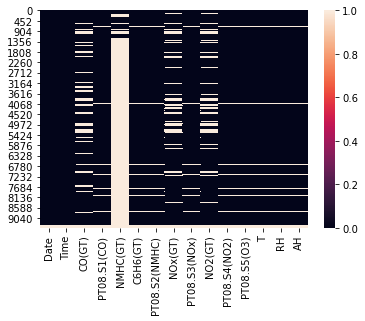

In [13]:
sns.heatmap(data.isnull())

# Our suspicions are confirmed, we see multiple rows with missing data across multiple columns which we see as white lines across the data. We note specifically that this occurs whenever Temperature is null so we can safely remove the invalid observations by removing rows where temperature is NA. We also see that whenever time and date are null, no data is recorded for any row

In [14]:
data[data['T'].isna()]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,01/04/2004,14.00.00,1.7,NaN,222.0,NaN,NaN,99.0,NaN,72.0,NaN,NaN,NaN,NaN,NaN
525,01/04/2004,15.00.00,1.9,NaN,197.0,NaN,NaN,108.0,NaN,81.0,NaN,NaN,NaN,NaN,NaN
526,01/04/2004,16.00.00,2.3,NaN,319.0,NaN,NaN,131.0,NaN,93.0,NaN,NaN,NaN,NaN,NaN
701,08/04/2004,23.00.00,2.0,NaN,137.0,NaN,NaN,129.0,NaN,106.0,NaN,NaN,NaN,NaN,NaN
702,09/04/2004,00.00.00,2.4,NaN,189.0,NaN,NaN,154.0,NaN,109.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data[data['T'].isna()].describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,330.000000,0.0,27.000000,0.0,0.0,322.000000,0.0,322.000000,0.0,0.0,0.0,0.0,0.0
mean,2.665455,NaN,225.518519,NaN,NaN,355.021739,NaN,134.813665,NaN,NaN,NaN,NaN,NaN
std,1.710300,NaN,114.773814,NaN,NaN,312.512414,NaN,59.085049,NaN,NaN,NaN,NaN,NaN
min,0.300000,NaN,66.000000,NaN,NaN,21.000000,NaN,35.000000,NaN,NaN,NaN,NaN,NaN
25%,1.500000,NaN,154.500000,NaN,NaN,109.500000,NaN,89.000000,NaN,NaN,NaN,NaN,NaN
50%,2.200000,NaN,197.000000,NaN,NaN,243.500000,NaN,122.500000,NaN,NaN,NaN,NaN,NaN
75%,3.500000,NaN,288.500000,NaN,NaN,508.250000,NaN,169.000000,NaN,NaN,NaN,NaN,NaN
max,9.300000,NaN,512.000000,NaN,NaN,1310.000000,NaN,340.000000,NaN,NaN,NaN,NaN,NaN


## This confirms our statement earlier, thus we will remove NAs where Temperature is NA

In [16]:
data[data['T'].isna()==False]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [17]:
len(data)-480

8991

In [18]:
data = data[data['T'].isna()==False]

In [19]:
data.isna().sum()

Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
NMHC(GT)         8104
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64

In [20]:
data[data['T'] == 0]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
8551,02/03/2005,01.00.00,0.8,765.0,NaN,1.5,544.0,122.0,1253.0,93.0,601.0,405.0,0.0,29.7,0.1847


### I just wanted to check that a temp of 0 was not recorded as null. All is good!

In [21]:
data = data.reset_index()

In [22]:
data = data.drop(columns = ['index'])

In [23]:
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
8987,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
8988,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
8989,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [24]:
date_times = data['Date']+' '+data['Time']
date_times[100]

'14/03/2004 22.00.00'

In [25]:
import datetime as dt

In [26]:
daytimes = []
for i in range(len(date_times)):
    daytime = dt.datetime.strptime(date_times[i], '%d/%m/%Y %H.%M.%S')
    daytimes.append(daytime)
data['DateTime'] = daytimes
data = data.drop(columns = ['Date','Time'])

In [27]:
min(data['DateTime'])

Timestamp('2004-03-10 18:00:00')

In [28]:
max(data['DateTime'])

Timestamp('2005-04-04 14:00:00')

In [29]:
min(data['DateTime']).hour

18

In [30]:
weekdays = []
for i in range(len(data['DateTime'])):
    weekdays.append(data['DateTime'][i].weekday())
data['Day_Of_Week'] = weekdays

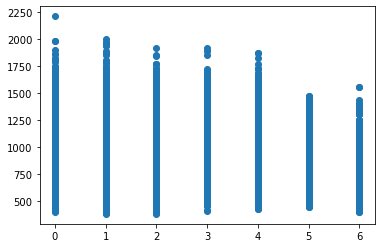

In [31]:
plt.scatter(data['Day_Of_Week'], data['PT08.S2(NMHC)'])

In [32]:
hours = []
for i in range(len(data['DateTime'])):
    hours.append(data['DateTime'][i].hour)
data['Hour'] = hours

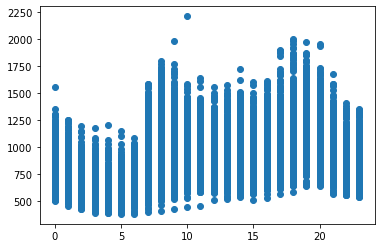

In [33]:
plt.scatter(data['Hour'], data['PT08.S2(NMHC)'])

In [34]:
months = []
for i in range(len(data['DateTime'])):
    months.append(data['DateTime'][i].month)
data['Month'] = months

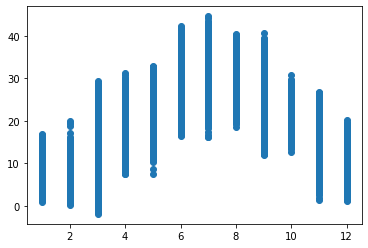

In [35]:
plt.scatter(data['Month'], data['T'])

In [36]:
days = []
for i in range(len(data['DateTime'])):
    days.append(data['DateTime'][i].day)
data['Day'] = days

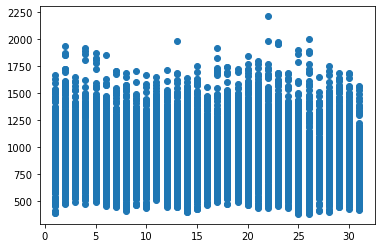

In [37]:
plt.scatter(data['Day'], data['PT08.S2(NMHC)'])

In [38]:
years = []
for i in range(len(data['DateTime'])):
    years.append(data['DateTime'][i].year)
data['Year'] = years

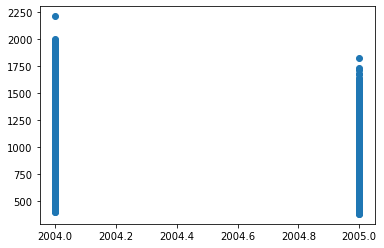

In [39]:
plt.scatter(data['Year'], data['PT08.S2(NMHC)'])

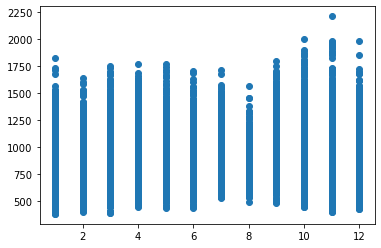

In [40]:
plt.scatter(data['Month'], data['PT08.S2(NMHC)'])

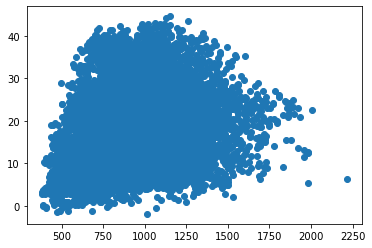

In [41]:
plt.scatter(data['PT08.S2(NMHC)'], data['T'])

In [42]:
for i in range(len(data['DateTime'])):
    if i > 0:
        if data['DateTime'][i]<data['DateTime'][i-1]:
            print(i)

# This shows time is chronological by row

In [43]:
data['DateTime'][0].date()

datetime.date(2004, 3, 10)

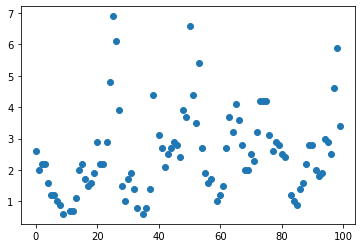

In [44]:
plt.scatter(data.head(100).index, data['CO(GT)'].head(100))

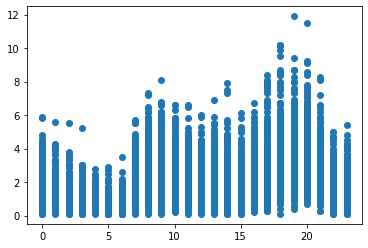

In [45]:
plt.scatter(data['Hour'], data['CO(GT)'])

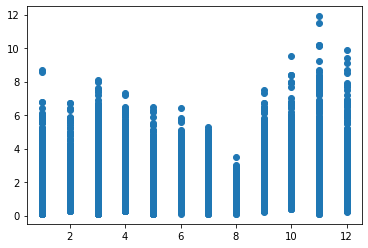

In [46]:
plt.scatter(data['Month'], data['CO(GT)'])

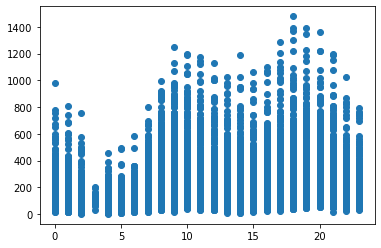

In [47]:
plt.scatter(data['Hour'], data['NOx(GT)'])

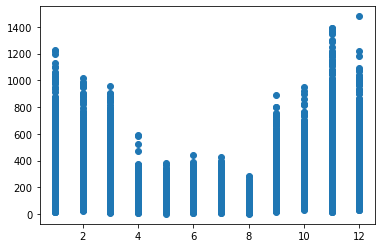

In [48]:
plt.scatter(data['Month'], data['NOx(GT)'])

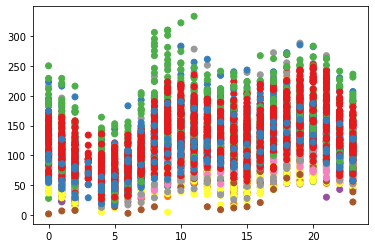

In [49]:
color_labels = data['Month'].unique()

# List of colors in the color palettes
rgb_values = sns.color_palette("Set1", data['Month'].nunique())

# Map continents to the colors
color_map = dict(zip(color_labels, rgb_values))
plt.scatter(data['Hour'], data['NO2(GT)'], c = data['Month'].map(color_map), label=color_map)

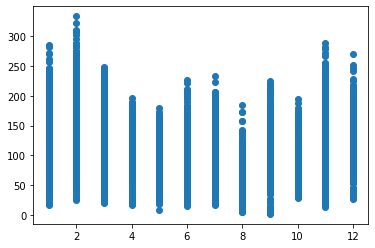

In [50]:
plt.scatter(data['Month'], data['NO2(GT)'])

In [51]:
data.isna().sum()

CO(GT)           1647
PT08.S1(CO)         0
NMHC(GT)         8104
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
DateTime            0
Day_Of_Week         0
Hour                0
Month               0
Day                 0
Year                0
dtype: int64

## I will be removing the NMHC variable entirely as too much of the full column is missing and for other columns I will impute the mean value for the given month and hour of the observation. We could impute the average for the date of the observation but that would lose track of the hourly trend we observed in the plots above.

In [52]:
data.groupby(['Month','Hour']).mean()['CO(GT)'][data.groupby(['Month','Hour']).mean()['CO(GT)'].isna()]

Month  Hour
5      4      NaN
Name: CO(GT), dtype: float64

In [53]:
data.groupby(['Month','Hour']).mean()['NOx(GT)'][data.groupby(['Month','Hour']).mean()['NOx(GT)'].isna()]

Month  Hour
1      3      NaN
2      3      NaN
5      3      NaN
6      3      NaN
7      3      NaN
8      3      NaN
9      3      NaN
10     3      NaN
12     3      NaN
Name: NOx(GT), dtype: float64

In [54]:
data.groupby(['Month','Hour']).mean()['NO2(GT)'][data.groupby(['Month','Hour']).mean()['NO2(GT)'].isna()]

Month  Hour
1      3      NaN
2      3      NaN
5      3      NaN
6      3      NaN
7      3      NaN
8      3      NaN
9      3      NaN
10     3      NaN
12     3      NaN
Name: NO2(GT), dtype: float64

In [55]:
31+28+31+30+31+31+30+31+31

274

## Strangely we observe that for the months of January, February, May, June, July, August, September, October, and December, the sensors for NO2(GT) and 'NOx(GT)' were shut off at 4am every day of the month. This accounts for 261 observations (my estimate above is slightly high as we will see). Meanwhile the sensor for CO(GT) was shut off at 5am every day during May. I will impute these values with the average of the means for the month hour groups directly surrounding the missing hour. For example for observations during January at 4am i will impute the average of the means for January at 3am and January at 5am. 

In [56]:
data.groupby(['Month','Hour'])['NOx(GT)'].sum()[7,3]

0.0

In [57]:
data[['NOx(GT)','Month','Hour','Day']][data['NOx(GT)'].isna()]

,NOx(GT),Month,Hour,Day
9,NaN,3,3,11
33,NaN,3,3,12
39,NaN,3,9,12
57,NaN,3,3,13
81,NaN,3,3,14
...,...,...,...,...
8308,NaN,3,3,7
8332,NaN,3,3,8
8356,NaN,3,3,9
8380,NaN,3,3,10


In [58]:
means = data.groupby(['Month','Hour'])['NOx(GT)'].mean()
means[data['Month'][9],data['Hour'][9]]

120.80952380952381

In [59]:
means = data.groupby(['Month','Hour'])['NOx(GT)'].mean()
rep = []
for i in data['NOx(GT)'].index:
    if data['NOx(GT)'].isna()[i]:
        rep.append(means[data['Month'][i],data['Hour'][i]])
    else:
        rep.append(data['NOx(GT)'][i])
data['NOx(GT)'] = rep
data['NOx(GT)'].isna().sum()
    
    

261

In [60]:
data['NOx(GT)'].isna()[9]

False

In [61]:
means = data.groupby(['Month','Hour'])['NOx(GT)'].mean()
rep = []
for i in data['NOx(GT)'].index:
    if data['NOx(GT)'].isna()[i]:
        new_val = (means[data['Month'][i],data['Hour'][i-1]]+means[data['Month'][i],data['Hour'][i+1]])/2
        rep.append(new_val)
    else:
        rep.append(data['NOx(GT)'][i])
data['NOx(GT)'] = rep
data['NOx(GT)'].isna().sum()

0

In [62]:
means = data.groupby(['Month','Hour'])['NO2(GT)'].mean()
rep = []
for i in data['NO2(GT)'].index:
    if data['NO2(GT)'].isna()[i]:
        rep.append(means[data['Month'][i],data['Hour'][i]])
    else:
        rep.append(data['NO2(GT)'][i])
data['NO2(GT)'] = rep
data['NO2(GT)'].isna().sum()

261

In [63]:
means = data.groupby(['Month','Hour'])['NO2(GT)'].mean()
rep = []
for i in data['NO2(GT)'].index:
    if data['NO2(GT)'].isna()[i]:
        new_val = (means[data['Month'][i],data['Hour'][i-1]]+means[data['Month'][i],data['Hour'][i+1]])/2
        rep.append(new_val)
    else:
        rep.append(data['NO2(GT)'][i])
data['NO2(GT)'] = rep
data['NO2(GT)'].isna().sum()

0

In [64]:
means = data.groupby(['Month','Hour'])['CO(GT)'].mean()
rep = []
for i in data['CO(GT)'].index:
    if data['CO(GT)'].isna()[i]:
        rep.append(means[data['Month'][i],data['Hour'][i]])
    else:
        rep.append(data['CO(GT)'][i])
data['CO(GT)'] = rep
data['CO(GT)'].isna().sum()

30

In [65]:
means = data.groupby(['Month','Hour'])['CO(GT)'].mean()
rep = []
for i in data['CO(GT)'].index:
    if data['CO(GT)'].isna()[i]:
        new_val = (means[data['Month'][i],data['Hour'][i-1]]+means[data['Month'][i],data['Hour'][i+1]])/2
        rep.append(new_val)
    else:
        rep.append(data['CO(GT)'][i])
data['CO(GT)'] = rep
data['CO(GT)'].isna().sum()

0

In [66]:
data = data.drop(columns = ['NMHC(GT)'])

In [67]:
data.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
DateTime         0
Day_Of_Week      0
Hour             0
Month            0
Day              0
Year             0
dtype: int64

## Lastly for data cleaning, the exact date is not really important for our analysis and will be unuseable in models. This can instead be stored as the number of days since the start of the experiment i will call this the Experiment Day ('Expday')

In [68]:
expday = []
day0 = min(data['DateTime'])
for i in range(len(data['DateTime'])):
    day = data['DateTime'][i]
    delta = day-day0
    expday.append(delta.days)
data['Expday'] = expday

In [69]:
max(data['Expday'])

389

## Now we will split the data into test and train splits

In [70]:
y = data['PT08.S5(O3)']
nums = []
for i in data.columns:
    if i == 'DateTime':
        continue
    if i != 'PT08.S5(O3)':
        nums.append(i)
X = data[nums]

In [71]:
X.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH',
       'Day_Of_Week', 'Hour', 'Month', 'Day', 'Year', 'Expday'],
      dtype='object')

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=2)

In [73]:
X_train

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),T,RH,AH,Day_Of_Week,Hour,Month,Day,Year,Expday
2601,2.9,1276.0,18.0,1241.0,274.0,642.0,171.0,2024.0,34.2,30.7,1.6252,2,10,6,30,2004,111
6235,6.2,1566.0,26.8,1474.0,985.0,1049.0,174.0,1887.0,12.3,79.7,1.1342,2,17,12,1,2004,265
5558,3.4,1305.0,19.7,1287.0,464.0,525.0,124.0,1771.0,26.2,43.5,1.4591,2,12,11,3,2004,237
4405,2.5,1171.0,13.0,1083.0,390.0,695.0,96.0,1758.0,22.9,59.1,1.6330,3,10,9,16,2004,189
3907,1.2,919.0,5.7,799.0,29.0,844.0,50.0,1409.0,22.2,43.1,1.1396,1,1,8,24,2004,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1.5,984.0,6.4,832.0,91.0,1034.0,81.0,1410.0,20.0,32.7,0.7545,0,16,4,26,2004,46
2514,1.9,1100.0,9.2,946.0,111.0,827.0,98.0,1726.0,30.5,33.9,1.4564,5,19,6,26,2004,108
6637,2.1,896.0,7.8,891.0,297.0,921.0,132.0,935.0,8.5,34.3,0.3813,1,14,12,21,2004,285
2575,5.7,1502.0,33.5,1631.0,350.0,459.0,140.0,2622.0,27.1,43.1,1.5224,1,8,6,29,2004,110


In [74]:
y_train

2601    1784.0
6235    1681.0
5558    1437.0
4405    1276.0
3907     881.0
         ...  
1099     636.0
2514     932.0
6637     766.0
2575    1858.0
7336    1506.0
Name: PT08.S5(O3), Length: 7192, dtype: float64

In [75]:
X_train.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
T                float64
RH               float64
AH               float64
Day_Of_Week        int64
Hour               int64
Month              int64
Day                int64
Year               int64
Expday             int64
dtype: object

In [159]:
X_test.shape

(1799, 17)

C:\Users\denis\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


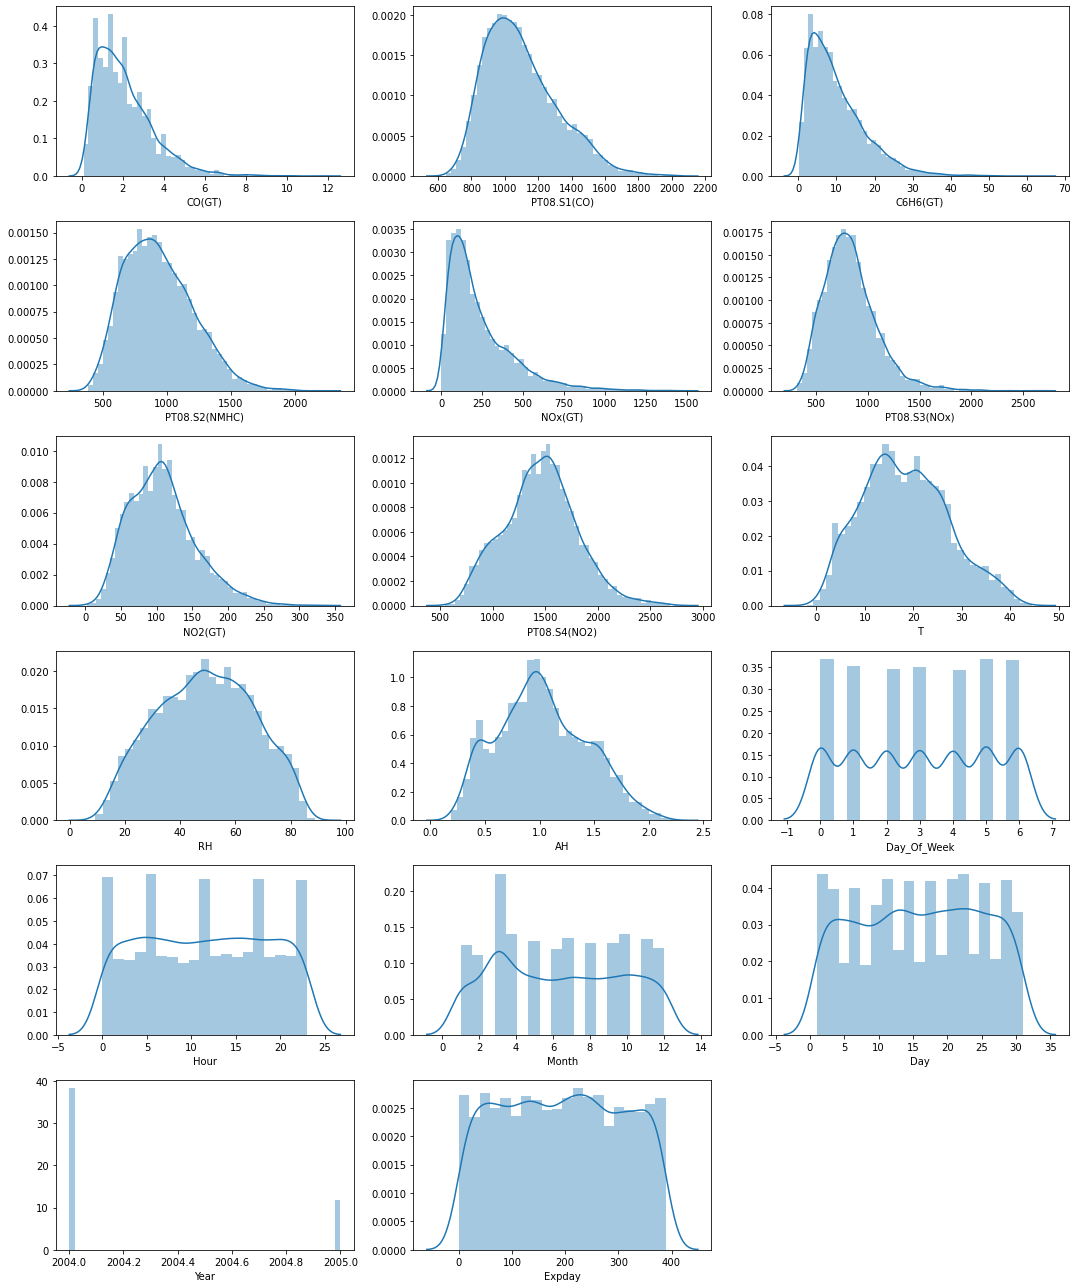

In [76]:
plt.figure(figsize=[15,3*math.ceil(len(nums)/3)])
for c in range(len(nums)):
    plt.subplot(math.ceil(len(nums)/3),3,c+1)
    sns.distplot(X_train[nums[c]])
plt.tight_layout()
plt.show()

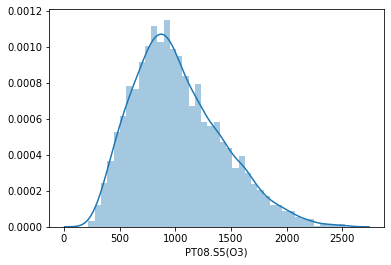

In [160]:
sns.distplot(y_train)

In [162]:
from scipy.stats.mstats import normaltest
normaltest(y_train)

NormaltestResult(statistic=413.17009971210285, pvalue=1.9109653121381873e-90)

In [201]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8938426195574631

In [203]:
prediction = lr.predict(X_train)
residual = (y_train - prediction)
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(residual)

NormaltestResult(statistic=907.6911734705918, pvalue=7.895252879459182e-198)

In [204]:
lr.coef_

array([-3.47107224e+01,  8.02183127e-01, -5.20684711e+00,  7.18656749e-01,
        1.84160291e-01, -1.89635215e-01,  9.58957710e-01,  7.10669166e-02,
       -9.20414546e+00, -1.45766356e+00,  4.42400760e+01, -2.45420623e+00,
       -6.95732765e+00, -6.88117985e+02, -2.32200806e+01, -8.33420474e+03,
        2.27822578e+01])

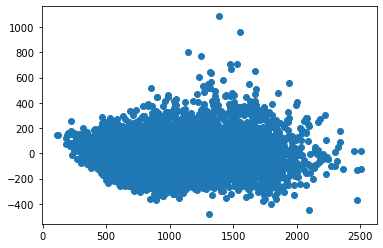

In [205]:
plt.scatter(prediction, residual)

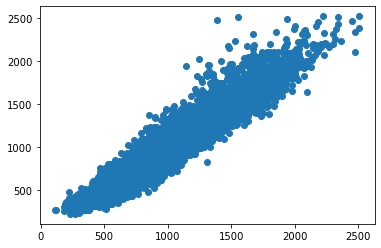

In [206]:
plt.scatter(prediction, y_train)

In [207]:
normaltest(residual)

NormaltestResult(statistic=907.6911734705918, pvalue=7.895252879459182e-198)

In [208]:
rmse = mean_squared_error(y_train, prediction, squared=False)
print(rmse)

130.19846869039853


In [374]:
zeros = 0
non_zeros = 0
for i in lr.coef_:
    if i == 0:
        zeros+=1
    else:
        non_zeros+=1
print('Total predictors = ' + str(zeros+non_zeros))
print('Total Zeroed out coefs = ' + str(zeros))
print('Predictors used = ' + str(non_zeros))

Total predictors = 17
Total Zeroed out coefs = 0
Predictors used = 17


In [216]:
lr.score(X_test,y_test)

0.8956480930504273

In [217]:
prediction_test = lr.predict(X_test)
rmse_test = mean_squared_error(y_test, prediction_test, squared=False)
print(rmse_test)

127.21610227473454


In [180]:
y_train_log = np.log(y_train)
normaltest(y_train_log)

NormaltestResult(statistic=136.07686286114617, pvalue=2.8267322407588265e-30)

In [183]:
from scipy.stats import boxcox
bc_res = boxcox(y_train)
boxcox_y_train = bc_res[0]
lam = bc_res[1]

In [184]:
normaltest(boxcox_y_train)

NormaltestResult(statistic=62.81187750807082, pvalue=2.2938979861936103e-14)

In [185]:
lr_log = LinearRegression()
lr_log.fit(X_train, y_train_log)
lr_log.score(X_train, y_train_log)

0.8887572201678513

In [209]:
lr_bc = LinearRegression()
lr_bc.fit(X_train, boxcox_y_train)
lr_bc.score(X_train, boxcox_y_train)

0.8943922418962704

In [210]:
prediction_bc = lr_bc.predict(X_train)
residual_bc = (boxcox_y_train - prediction_bc)
normaltest(residual_bc)

NormaltestResult(statistic=103.51394495834833, pvalue=3.328376540337062e-23)

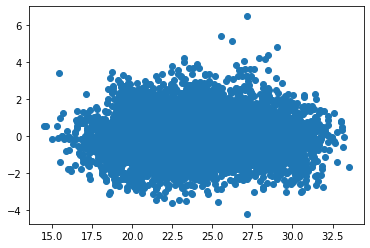

In [211]:
plt.scatter(prediction_bc, residual_bc)

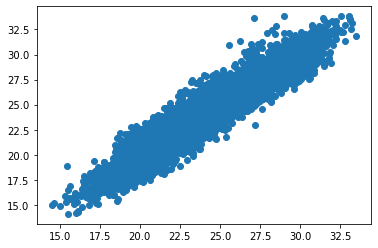

In [212]:
plt.scatter(prediction_bc, boxcox_y_train)

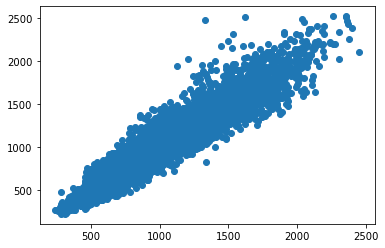

In [213]:
from scipy.special import inv_boxcox
truey = inv_boxcox(boxcox_y_train,lam)
pred_true = inv_boxcox(prediction_bc,lam)
plt.scatter(pred_true, truey)

In [214]:
r2_score(pred_true, truey)

0.8796590885242365

In [215]:
rmse_true = mean_squared_error(truey, pred_true, squared=False)
print(rmse_true)

131.9627951053701


In [219]:
bc_y_test = boxcox(y_test, lam)
lr_bc.score(X_test, bc_y_test)

0.891781086244455

In [220]:
pred_bc_test = lr_bc.predict(X_test)
pred_bc_test_true = inv_boxcox(pred_bc_test,lam)
r2_score(pred_bc_test_true, y_test)

0.8834031045054416

In [221]:
rmse_test_true = mean_squared_error(y_test, pred_bc_test_true, squared=False)
print(rmse_test_true)

129.17828992369897


## Box Cox and Log Transformations useful for improving accuracy on larger values but reduces total model error slightly for rmse and R-squared

## Now Lets Add polynomial features, feature scaling and cross validation

In [222]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

kf = KFold(shuffle=True, random_state=7, n_splits=10)
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("linear_regression", LinearRegression())])
params = {
    'polynomial_features__degree': [1, 2, 3]
}

grid = GridSearchCV(estimator, params, cv=kf)

In [223]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'polynomial_features__degree': [1, 2, 3]})

In [224]:
grid.best_score_, grid.best_params_

(0.9321767547104851, {'polynomial_features__degree': 2})

In [225]:
y_train_predict = grid.predict(X_train)
r2_score(y_train, y_train_predict)

0.9406166666316249

In [226]:
rmse_poly = mean_squared_error(y_train, y_train_predict, squared=False)
print(rmse_poly)

97.37849672221881


In [373]:
zeros = 0
non_zeros = 0
for i in grid.best_estimator_.named_steps['linear_regression'].coef_:
    if i == 0:
        zeros+=1
    else:
        non_zeros+=1
print('Total predictors = ' + str(zeros+non_zeros))
print('Total Zeroed out coefs = ' + str(zeros))
print('Predictors used = ' + str(non_zeros))

Total predictors = 171
Total Zeroed out coefs = 0
Predictors used = 171


In [89]:
y_test_predict = grid.predict(X_test)
r2_score(y_test, y_test_predict)

0.9345212195661008

In [227]:
rmse_poly_test = mean_squared_error(y_test, y_test_predict, squared=False)
print(rmse_poly_test)

100.77253444915712


## L2 Norm Penalized (Ridge) Regression

In [241]:
from sklearn.linear_model import Ridge
kf_rid = KFold(shuffle=True, random_state=7, n_splits=10)
estimator_rid = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])
params_rid = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(0.01, 100, 100)
}

grid_rid = GridSearchCV(estimator_rid, params_rid, cv=kf_rid)

In [242]:
grid_rid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02...
       1.17681195e+01, 1.29154967e+01, 1.41747416e+01, 1.55567614e+01,
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02])})

In [243]:
grid_rid.best_score_, grid_rid.best_params_

(0.9562651773109637,
 {'polynomial_features__degree': 3,
  'ridge_regression__alpha': 29.836472402833405})

In [ ]:
grid_rid.cv_results_['params']

In [253]:
kf_rid = KFold(shuffle=True, random_state=7, n_splits=10)
estimator_rid = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])
params_rid = {
    'polynomial_features__degree': [3],
    'ridge_regression__alpha': np.geomspace(0.01, 100, 100)
}

grid_rid = GridSearchCV(estimator_rid, params_rid, cv=kf_rid)

grid_rid.fit(X_train, y_train)

grid_rid.best_score_, grid_rid.best_params_

(0.9562651773109637,
 {'polynomial_features__degree': 3,
  'ridge_regression__alpha': 29.836472402833405})

In [255]:
rid_cv_scores_degree_3 = grid_rid.cv_results_['mean_test_score']

<function matplotlib.pyplot.show(*args, **kw)>

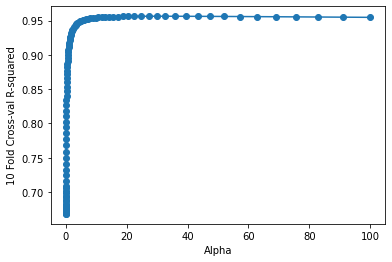

In [261]:
plt.scatter(np.geomspace(0.01, 100, 100),rid_cv_scores_degree_3)
plt.plot(np.geomspace(0.01, 100, 100),rid_cv_scores_degree_3)
plt.xlabel('Alpha')
plt.ylabel('10 Fold Cross-val R-squared')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

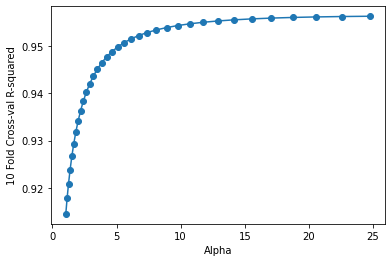

In [262]:
plt.scatter(np.geomspace(0.01, 100, 100)[50:85],rid_cv_scores_degree_3[50:85])
plt.plot(np.geomspace(0.01, 100, 100)[50:85],rid_cv_scores_degree_3[50:85])
plt.xlabel('Alpha')
plt.ylabel('10 Fold Cross-val R-squared')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

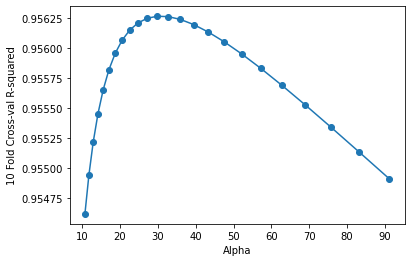

In [263]:
plt.scatter(np.geomspace(0.01, 100, 100)[75:99],rid_cv_scores_degree_3[75:99])
plt.plot(np.geomspace(0.01, 100, 100)[75:99],rid_cv_scores_degree_3[75:99])
plt.xlabel('Alpha')
plt.ylabel('10 Fold Cross-val R-squared')
plt.show

In [244]:
y_train_predict_rid = grid_rid.predict(X_train)
r2_score(y_train, y_train_predict_rid)

0.9649823601721527

In [245]:
rmse_ridge_train = mean_squared_error(y_train, y_train_predict_rid, squared=False)
print(rmse_ridge_train)

74.77806372186178


In [246]:
y_test_predict_rid = grid_rid.predict(X_test)
r2_score(y_test, y_test_predict_rid)

0.9579539599205492

In [247]:
rmse_ridge_test = mean_squared_error(y_test, y_test_predict_rid, squared=False)
print(rmse_ridge_test)

80.75221437161132


In [248]:
grid_rid.best_estimator_.named_steps['ridge_regression'].coef_

array([  0.        , -12.42998285,  70.68100359, ..., -16.39984561,
        -7.0214349 ,  -2.82279967])

In [249]:
zeros = 0
non_zeros = 0
for i in grid_rid.best_estimator_.named_steps['ridge_regression'].coef_:
    if i == 0:
        zeros+=1
    else:
        non_zeros+=1
print('Total predictors = ' + str(zeros+non_zeros))
print('Total Zeroed out coefs = ' + str(zeros))
print('Predictors used = ' + str(non_zeros))

Total predictors = 1140
Total Zeroed out coefs = 1
Predictors used = 1139


In [271]:
rid5 = Ridge(alpha=5)

pf = PolynomialFeatures(degree=3)
        
rid5_estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("ridge_regression", rid5)])
rid5_estimator.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('make_higher_degree', PolynomialFeatures(degree=3)),
                ('ridge_regression', Ridge(alpha=5))])

In [272]:
rid5_estimator.score(X_train, y_train)

0.9677976173047493

In [274]:
zeros = 0
non_zeros = 0
for i in rid5_estimator.named_steps['ridge_regression'].coef_:
    if i == 0:
        zeros+=1
    else:
        non_zeros+=1
print('Total predictors = ' + str(zeros+non_zeros))
print('Total Zeroed out coefs = ' + str(zeros))
print('Predictors used = ' + str(non_zeros))

Total predictors = 1140
Total Zeroed out coefs = 1
Predictors used = 1139


# Lasso Regression

In [100]:
from sklearn.linear_model import Lasso
#kf_las = KFold(shuffle=True, random_state=7, n_splits=10)
#estimator_las = Pipeline([("scaler", StandardScaler()),
#        ("polynomial_features", PolynomialFeatures()),
#        ("lasso_regression", Lasso())])
#params_las = {
#    'polynomial_features__degree': [3],
#    'lasso_regression__alpha': np.geomspace(0.01, 1, 10)
#}
#
#grid_las = GridSearchCV(estimator_las, params_las, cv=kf_las)

In [101]:
#grid_las.fit(X_train, y_train)

In [102]:
#grid_las.best_score_, grid_las.best_params_

## This takes way too long to run for lasso, so lets try an alternative faster method

In [288]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Lasso

In [289]:
s = StandardScaler()
kf_las = KFold(shuffle=True, random_state=7, n_splits=3)
pf = PolynomialFeatures(degree=3)
scores = []
alphas = np.geomspace(0.1, 1, 10)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=10000)
        
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X_train, y_train, cv = kf_las)
    
        
    score = r2_score(y_train, predictions)
    
    scores.append(score)
    print(alpha)

C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1796070.8269230947, tolerance: 74758.13761061743
  model = cd_fast.enet_coordinate_descent(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1875458.9200012758, tolerance: 77419.9048997706
  model = cd_fast.enet_coordinate_descent(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2137178.5212712735, tolerance: 77500.09082494266
  model = cd_fast.enet_coordinate_descent(


0.1


C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 934774.2344775908, tolerance: 74758.13761061743
  model = cd_fast.enet_coordinate_descent(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 893697.2811573148, tolerance: 77419.9048997706
  model = cd_fast.enet_coordinate_descent(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1524482.7688401006, tolerance: 77500.09082494266
  model = cd_fast.enet_coordinate_descent(


0.1291549665014884


C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 625101.2748375945, tolerance: 74758.13761061743
  model = cd_fast.enet_coordinate_descent(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328745.55993689597, tolerance: 77419.9048997706
  model = cd_fast.enet_coordinate_descent(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 596485.1309149861, tolerance: 77500.09082494266
  model = cd_fast.enet_coordinate_descent(


0.16681005372000587


C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99333.75226602703, tolerance: 74758.13761061743
  model = cd_fast.enet_coordinate_descent(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117583.86162704974, tolerance: 77419.9048997706
  model = cd_fast.enet_coordinate_descent(


0.21544346900318834
0.2782559402207124
0.35938136638046275
0.46415888336127786
0.5994842503189409
0.774263682681127
1.0


<function matplotlib.pyplot.show(*args, **kw)>

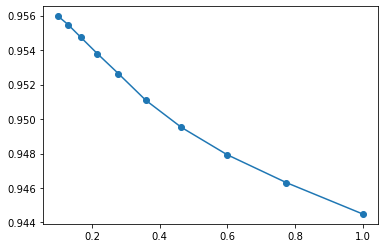

In [290]:
plt.scatter(alphas,scores)
plt.plot(alphas,scores)
plt.show

In [291]:
new_alphas = [1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]
for alpha in new_alphas:
    las = Lasso(alpha=alpha, max_iter=10000)
        
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X_train, y_train, cv = kf_las)
    
        
    score = r2_score(y_train, predictions)
    
    scores.append(score)
    print(alpha)

1.5
2
2.5
3
3.5
4
4.5
5
5.5
6
6.5
7
7.5
8
8.5
9
9.5
10


In [292]:
newer_alphas = [10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 20]
for alpha in newer_alphas:
    las = Lasso(alpha=alpha, max_iter=10000)
        
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X_train, y_train, cv = kf_las)
    
        
    score = r2_score(y_train, predictions)
    
    scores.append(score)
    print(alpha)

10.5
11
11.5
12
12.5
13
13.5
14
14.5
15
15.5
16
16.5
17
17.5
18
18.5
19
19.5
20


In [293]:
newest_alphas = np.geomspace(20.5, 100, 10)
for alpha in newest_alphas:
    las = Lasso(alpha=alpha, max_iter=10000)
        
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X_train, y_train, cv = kf_las)
    
        
    score = r2_score(y_train, predictions)
    
    scores.append(score)
    print(alpha)

20.499999999999996
24.44700460170612
29.153952877845864
34.767161959152276
41.46112040993453
49.44391226602737
58.963685399703685
70.31636528293211
83.85485393400438
100.0


In [294]:
alphas

array([0.1       , 0.12915497, 0.16681005, 0.21544347, 0.27825594,
       0.35938137, 0.46415888, 0.59948425, 0.77426368, 1.        ])

In [295]:
all_alphs = []
for i in alphas:
    all_alphs.append(i)
for j in new_alphas:
    all_alphs.append(j)
for k in newer_alphas:
    all_alphs.append(k)
for y in newest_alphas:
    all_alphs.append(y)

<function matplotlib.pyplot.show(*args, **kw)>

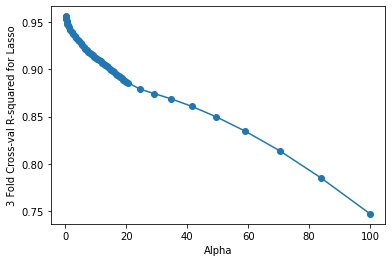

In [320]:
plt.scatter(all_alphs,scores)
plt.plot(all_alphs,scores)
plt.xlabel('Alpha')
plt.ylabel('3 Fold Cross-val R-squared for Lasso')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

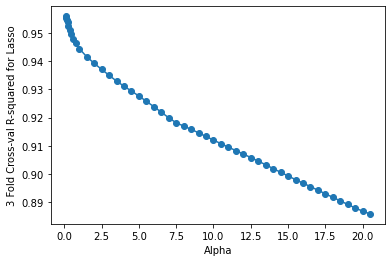

In [322]:
plt.scatter(all_alphs[0:49],scores[0:49])
plt.plot(all_alphs[0:49],scores[0:49])
plt.xlabel('Alpha')
plt.ylabel('3 Fold Cross-val R-squared for Lasso')
plt.show

In [335]:
nonzero_coefs = []
zero_coefs=[]
for a in all_alphs[4:49]:
    las = Lasso(alpha=a, max_iter=10000)
        
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])
    estimator.fit(X_train, y_train)
    
    zeros = 0
    non_zeros = 0
    for i in estimator.named_steps['lasso_regression'].coef_:
        if i == 0:
            zeros+=1
        else:
            non_zeros+=1
            
    nonzero_coefs.append(non_zeros)
    zero_coefs.append(zeros)
    
    

<function matplotlib.pyplot.show(*args, **kw)>

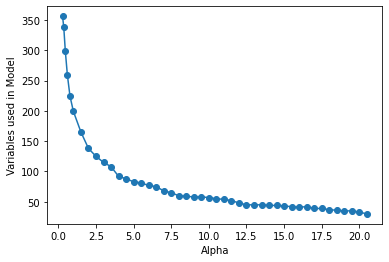

In [336]:
plt.scatter(all_alphs[4:49],nonzero_coefs)
plt.plot(all_alphs[4:49],nonzero_coefs)
plt.xlabel('Alpha')
plt.ylabel('Variables used in Model')
plt.show

In [364]:
print(all_alphs[4:49][6],nonzero_coefs[6])

1.5 165


In [353]:
print(all_alphs[4:49][7],nonzero_coefs[7])

2 138


In [345]:
print(all_alphs[4:49][10],nonzero_coefs[10])

3.5 108


In [346]:
print(all_alphs[4:49][11],nonzero_coefs[11])

4 92


In [359]:
final_as = [0.6, 1.0, 2.0, 4.0, 7.5]
final_lasso_train_rsquares = []
final_lasso_train_rmses = []
final_lasso_test_rsquares = []
final_lasso_test_rmses = []
for a in final_as:
    las = Lasso(alpha=a, max_iter=10000)
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])
    estimator.fit(X_train, y_train)
    pred_train = estimator.predict(X_train)
    final_lasso_train_rsquares.append(estimator.score(X_train, y_train))
    rmse = mean_squared_error(y_train, pred_train, squared=False)
    final_lasso_train_rmses.append(rmse)
    pred_test = estimator.predict(X_test)
    r2_test = r2_score(pred_test, y_test)
    final_lasso_test_rsquares.append(r2_test)
    rmse_test = mean_squared_error(y_test, pred_test, squared=False)
    final_lasso_test_rmses.append(rmse_test)
    print(a)

0.6
1.0
2.0
4.0
7.5


In [363]:
for i in range(len(final_as)):
    print('For alpha = '+ str(final_as[i]))
    print('Training R2 = ' + str(final_lasso_train_rsquares[i]))
    print('Training RMSE = ' + str(final_lasso_train_rmses[i]))
    print('Testing R2 = ' + str(final_lasso_test_rsquares[i]))
    print('Testing RMSE = ' + str(final_lasso_test_rmses[i]))
    print()
    

For alpha = 0.6
Training R2 = 0.9523693942549957
Training RMSE = 87.21151523478096
Testing R2 = 0.9458463181625164
Testing RMSE = 88.87777021416125

For alpha = 1.0
Training R2 = 0.9481667310870305
Training RMSE = 90.97772637727176
Testing R2 = 0.9416068275182136
Testing RMSE = 91.87174531654908

For alpha = 2.0
Training R2 = 0.9420732917577805
Training RMSE = 96.17677377301867
Testing R2 = 0.9349452606822252
Testing RMSE = 96.15438142085645

For alpha = 4.0
Training R2 = 0.9333933745083215
Training RMSE = 103.1310633082546
Testing R2 = 0.9244274827810788
Testing RMSE = 102.33431375912349

For alpha = 7.5
Training R2 = 0.919629885561265
Training RMSE = 113.28647748244653
Testing R2 = 0.9053330780034003
Testing RMSE = 112.38674687608649



In [372]:
print('For alpha = '+ str(all_alphs[4:49][3]) + ' number of variables in model = '+ str(nonzero_coefs[3]))
print()
print('For alpha = '+ str(all_alphs[4:49][5]) + ' number of variables in model = '+ str(nonzero_coefs[5]))
print()
print('For alpha = '+ str(all_alphs[4:49][7]) + ' number of variables in model = '+ str(nonzero_coefs[7]))
print()
print('For alpha = '+ str(all_alphs[4:49][11]) + ' number of variables in model = '+ str(nonzero_coefs[11]))
print()
print('For alpha = '+ str(all_alphs[4:49][18]) + ' number of variables in model = '+ str(nonzero_coefs[18]))

For alpha = 0.5994842503189409 number of variables in model = 259

For alpha = 1.0 number of variables in model = 199

For alpha = 2 number of variables in model = 138

For alpha = 4 number of variables in model = 92

For alpha = 7.5 number of variables in model = 65


In [330]:
zeros = 0
non_zeros = 0
for i in estimator.named_steps['lasso_regression'].coef_:
    if i == 0:
        zeros+=1
    else:
        non_zeros+=1
print('Total predictors = ' + str(zeros+non_zeros))
print('Total Zeroed out coefs = ' + str(zeros))
print('Predictors used = ' + str(non_zeros))

Total predictors = 1140
Total Zeroed out coefs = 881
Predictors used = 259


In [331]:
las = Lasso(alpha=2, max_iter=10000)
        
estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])
estimator.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('make_higher_degree', PolynomialFeatures(degree=3)),
                ('lasso_regression', Lasso(alpha=2, max_iter=10000))])

In [332]:
estimator.score(X_train, y_train)

0.9420732917577805

In [333]:
estimator.score(X_test, y_test)

0.9403851609224512

In [334]:
zeros = 0
non_zeros = 0
for i in estimator.named_steps['lasso_regression'].coef_:
    if i == 0:
        zeros+=1
    else:
        non_zeros+=1
print('Total predictors = ' + str(zeros+non_zeros))
print('Total Zeroed out coefs = ' + str(zeros))
print('Predictors used = ' + str(non_zeros))

Total predictors = 1140
Total Zeroed out coefs = 1002
Predictors used = 138


In [309]:
las = Lasso(alpha=5, max_iter=10000)
        
estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])
estimator.fit(X_train, y_train)
estimator.score(X_train, y_train)

0.9296953012684491

In [310]:
estimator.score(X_test, y_test)

0.9288381111020527

In [311]:
zeros = 0
non_zeros = 0
for i in estimator.named_steps['lasso_regression'].coef_:
    if i == 0:
        zeros+=1
    else:
        non_zeros+=1
print('Total predictors = ' + str(zeros+non_zeros))
print('Total Zeroed out coefs = ' + str(zeros))
print('Predictors used = ' + str(non_zeros))

Total predictors = 1140
Total Zeroed out coefs = 1057
Predictors used = 83


In [156]:
las = Lasso(alpha=0.1, max_iter=10000)
pf2 = PolynomialFeatures(degree=2)        
estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf2),
        ("lasso_regression", las)])
estimator.fit(X_train, y_train)
estimator.score(X_train, y_train)

0.9378409955669151

In [157]:
zeros = 0
non_zeros = 0
for i in estimator.named_steps['lasso_regression'].coef_:
    if i == 0:
        zeros+=1
    else:
        non_zeros+=1
print('Total predictors = ' + str(zeros+non_zeros))
print('Total Zeroed out coefs = ' + str(zeros))
print('Predictors used = ' + str(non_zeros))

Total predictors = 171
Total Zeroed out coefs = 47
Predictors used = 124


In [158]:
estimator.score(X_test, y_test)

0.9347599742280421

# Most Efficient Lasso Model

In [375]:
las = Lasso(alpha=4, max_iter=10000)
        
estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])
estimator.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('make_higher_degree', PolynomialFeatures(degree=3)),
                ('lasso_regression', Lasso(alpha=4, max_iter=10000))])

In [376]:
estimator.score(X_train, y_train)

0.9333933745083215

In [377]:
estimator.score(X_test, y_test)

0.9324759033985038

In [384]:
mod_coefs = estimator.named_steps['lasso_regression'].coef_

In [383]:
pf.fit(X_train)
features = pf.get_feature_names(X_train.columns)

# Most Important Features and their Coefficients in the Lasso Model for alpha = 4.0
## Sorted in order of number of interactions per term

In [386]:
imp_feats = {}
for i in range(len(mod_coefs)):
    if mod_coefs[i] != 0:
        imp_feats[features[i]] = mod_coefs[i]
imp_feats

{'PT08.S1(CO)': 145.12965537767937,
 'PT08.S2(NMHC)': 134.70803656758034,
 'PT08.S3(NOx)': -48.743577415793844,
 'NO2(GT)': 1.8101782292533517,
 'Hour': -56.02909822708514,
 'PT08.S1(CO) NO2(GT)': 8.416095818468781,
 'C6H6(GT) RH': -10.943937288158494,
 'NOx(GT) RH': -15.931127196655261,
 'NOx(GT) Hour': 1.885990978754237,
 'NO2(GT) RH': -8.708706206366676,
 'PT08.S4(NO2) T': 12.003189523015514,
 'T Day_Of_Week': -1.778727911124095,
 'T Hour': -7.658399784905559,
 'RH^2': -16.42681230753713,
 'AH Day_Of_Week': -1.1402070713685937,
 'Day_Of_Week^2': -7.793825397712833,
 'Day_Of_Week Day': 0.1645409773638183,
 'Hour^2': 22.82372608038908,
 'Expday^2': -11.696231720951609,
 'CO(GT)^3': 0.040649984504274136,
 'CO(GT)^2 Hour': -3.205861376911894,
 'CO(GT)^2 Month': 0.3068577329301263,
 'CO(GT)^2 Day': 0.27989160608080416,
 'CO(GT)^2 Year': -2.18591255493694,
 'CO(GT) C6H6(GT)^2': -0.396003545272386,
 'PT08.S1(CO)^2 NO2(GT)': 2.890093960810776,
 'PT08.S1(CO)^2 PT08.S4(NO2)': -2.7339805333049

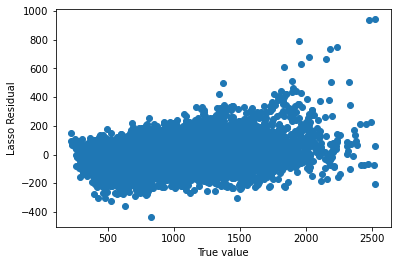

In [388]:
lasso_preds = estimator.predict(X_train)
las_residuals = y_train - lasso_preds
plt.scatter(y_train, las_residuals)
plt.xlabel('True value')
plt.ylabel('Lasso Residual')
plt.show()

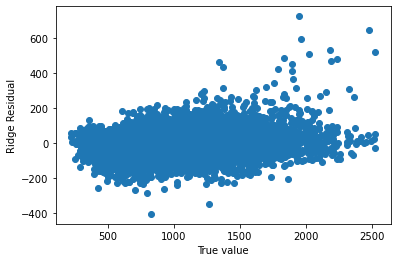

In [389]:
ridge_preds = grid_rid.predict(X_train)
rid_residuals = y_train - ridge_preds
plt.scatter(y_train, rid_residuals)
plt.xlabel('True value')
plt.ylabel('Ridge Residual')
plt.show()

# Best Overall Model for prediction accuracy: 
## Ridge Regression using polynomial degree 3 interactions with alpha = 29.836472402833405

# Best Model for understanding important features for predicting Indium Oxide in the air:
## Lasso Regression using polynomial degree 3 interactions with alpha = 4.0